In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
random_seed = 24

# ML Algorithms with 42 Features 

In [20]:
training_dataset = pd.read_csv("UNSW-NB15_Training_Processed.csv")
testing_dataset = pd.read_csv("UNSW-NB15_Testing_Processed.csv")

In [3]:
training_dataset


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,123041.020944,141321.008087,117163.991557,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,123041.020944,141321.008087,117163.991557,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,123041.020944,141321.008087,117163.991557,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,123041.020944,4979.997301,117163.991557,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,123041.020944,141321.008087,117163.991557,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,123041.020944,141321.008087,117163.991557,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
testing_dataset

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,92700.995071,141321.008087,116438.010265,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,123041.020944,141321.008087,117163.991557,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [21]:
X_train = training_dataset.drop(["label", "attack_cat"], axis = 1)
y_train = training_dataset['label'].values 

In [22]:
X_test = testing_dataset.drop(["label", "attack_cat"], axis = 1)
y_test = testing_dataset["label"].values


In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(175341, 42) (175341,) (82332, 42) (82332,)


In [24]:
target_names = ["Normal", "Attack"]

Testing accuracy of Decision Tree:  0.8595928679006948
Precision of Decision Tree:  0.875728973227065
Recall of Decision Tree: 0.8487314682546307
F1_Score of Decision Tree: 0.8541477541769958

Classification Report of Decision Tree  42 Features: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83     37000
           1       0.82      0.96      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



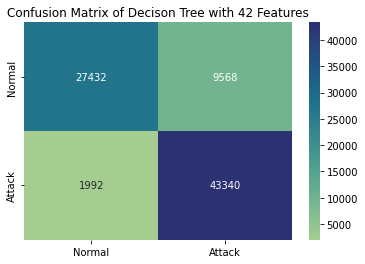

In [14]:
clf_dt = DecisionTreeClassifier(random_state = random_seed)
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

score1 = accuracy_score(y_test,y_pred_dt)

print("Testing accuracy of Decision Tree: ", score1)
print("Precision of Decision Tree: ", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall of Decision Tree:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1_Score of Decision Tree:", f1_score(y_test, y_pred_dt, average='macro'))

print("")
target_names = ["Normal", "Attack"]
print("Classification Report of Decision Tree  42 Features: \n", classification_report(y_test, y_pred_dt))

conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree with 42 Features')
plt.show()

Testing accuracy of Random Forest:  0.8703906136131759
Precision of Random Forest:  0.896425287740916
Recall of Random Forest: 0.8574589443409704
F1_Score of Random Forest: 0.8641360926386112

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.73      0.83     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
weighted avg       0.89      0.87      0.87     82332



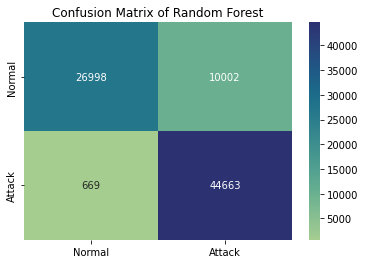

In [25]:
clf_rf = RandomForestClassifier(random_state=random_seed)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

score2 = accuracy_score(y_test,y_pred_rf)

print("Testing accuracy of Random Forest: ", score2)
print("Precision of Random Forest: ", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall of Random Forest:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1_Score of Random Forest:", f1_score(y_test, y_pred_rf, average='macro'))

print("")
print("Classification Report of Random Forest: \n", classification_report(y_test, y_pred_rf))

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Random Forest')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy of Logistic Regression:  0.8040251663994559
Precision of Logistic Regression:  0.8490971053891263
Recall of Logistic Regression: 0.7847263874215696
F1_Score of Logistic Regression: 0.7886012143208608

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73     37000
           1       0.75      0.98      0.85     45332

    accuracy                           0.80     82332
   macro avg       0.85      0.78      0.79     82332
weighted avg       0.84      0.80      0.79     82332



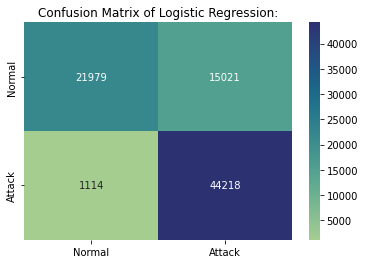

In [16]:
clf_lr = LogisticRegression(random_state=random_seed)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

score3 = accuracy_score(y_test,y_pred_lr)

print("Testing accuracy of Logistic Regression: ", score3)
print("Precision of Logistic Regression: ", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall of Logistic Regression:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1_Score of Logistic Regression:", f1_score(y_test, y_pred_lr, average='macro'))

print("")
print("Classification Report of Logistic Regression: \n", classification_report(y_test, y_pred_lr))

conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat_lr, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression:')
plt.show()

Testing accuracy of Gaussian Naive Bayes:  0.7520283729291163
Precision of Gaussian Naive Bayes:  0.767996249159867
Recall of Gaussian Naive Bayes: 0.7364301275156742
F1_Score of Gaussian Naive Bayes: 0.7383478371259169

Classification Report of Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.81      0.58      0.68     37000
           1       0.72      0.89      0.80     45332

    accuracy                           0.75     82332
   macro avg       0.77      0.74      0.74     82332
weighted avg       0.76      0.75      0.74     82332



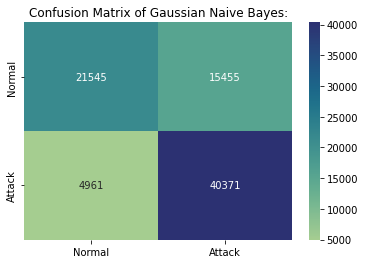

In [17]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

score4 = accuracy_score(y_test,y_pred_nb)

print("Testing accuracy of Gaussian Naive Bayes: ", score4)
print("Precision of Gaussian Naive Bayes: ", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall of Gaussian Naive Bayes:", recall_score(y_test, y_pred_nb, average='macro'))
print("F1_Score of Gaussian Naive Bayes:", f1_score(y_test, y_pred_nb, average='macro'))

print("")
print("Classification Report of Gaussian Naive Bayes: \n", classification_report(y_test, y_pred_nb))

conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_mat_nb, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Gaussian Naive Bayes:')
plt.show()

Testing accuracy of kNN:  0.8477991546421805
Precision of kNN:  0.8711749222526862
Recall of kNN: 0.8346188194724329
F1_Score of kNN: 0.8404439800247843

Classification Report of kNN: 
               precision    recall  f1-score   support

           0       0.94      0.70      0.81     37000
           1       0.80      0.96      0.87     45332

    accuracy                           0.85     82332
   macro avg       0.87      0.83      0.84     82332
weighted avg       0.86      0.85      0.84     82332



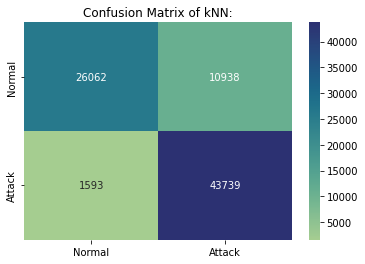

In [27]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

score5 = accuracy_score(y_test,y_pred_knn)

print("Testing accuracy of kNN: ", score5)
print("Precision of kNN: ", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall of kNN:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1_Score of kNN:", f1_score(y_test, y_pred_knn, average='macro'))

print("")
print("Classification Report of kNN: \n", classification_report(y_test, y_pred_knn))

conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of kNN:')
plt.show()

Testing accuracy of SGD:  0.8093693825001215
Precision of SGD:  0.8705370423772711
Recall of SGD: 0.7880171753859215
F1_Score of SGD: 0.7917678761106848

Classification Report of Stochastic Gradient Descent: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     37000
           1       0.74      1.00      0.85     45332

    accuracy                           0.81     82332
   macro avg       0.87      0.79      0.79     82332
weighted avg       0.86      0.81      0.80     82332



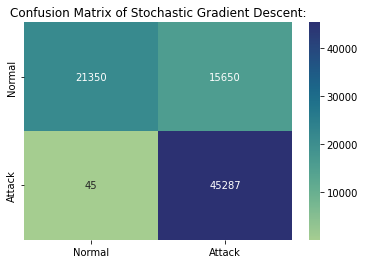

In [29]:
clf_sgd = SGDClassifier(random_state=random_seed)
clf_sgd.fit(X_train, y_train)

y_pred_sgd = clf_sgd.predict(X_test)

score6 = accuracy_score(y_test,y_pred_sgd)

print("Testing accuracy of SGD: ", score6)
print("Precision of SGD: ", precision_score(y_test, y_pred_sgd, average='macro'))
print("Recall of SGD:", recall_score(y_test, y_pred_sgd, average='macro'))
print("F1_Score of SGD:", f1_score(y_test, y_pred_sgd, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent: \n", classification_report(y_test, y_pred_sgd))

conf_mat_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(conf_mat_sgd, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent:')
plt.show()

# ML Algorithms with 39 Features 

In [26]:
training_dataset = pd.read_csv("UNSW_training_P-value.csv")
testing_dataset = pd.read_csv("UNSW_testing_P-value.csv")

In [27]:
training_dataset 

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,123041.020944,141321.008087,117163.991557,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,123041.020944,141321.008087,117163.991557,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,123041.020944,141321.008087,117163.991557,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,123041.020944,4979.997301,117163.991557,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,123041.020944,141321.008087,117163.991557,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,123041.020944,141321.008087,117163.991557,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [28]:
testing_dataset 

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,92700.995071,141321.008087,116438.010265,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,123041.020944,141321.008087,117163.991557,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [29]:
X_train = training_dataset.drop(["label", "attack_cat"], axis = 1)
y_train = training_dataset['label'].values 

In [30]:
X_test = testing_dataset.drop(["label", "attack_cat"], axis = 1)
y_test = testing_dataset["label"].values

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(175341, 39) (175341,) (82332, 39) (82332,)


Testing accuracy of Decision Tree:  0.8600544138366614
Precision of Decision Tree:  0.8766594241920409
Recall of Decision Tree: 0.8490760849086977
F1_Score of Decision Tree: 0.8545574908466026

Classification Report of Decision Tree  39 Features: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83     37000
           1       0.82      0.96      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



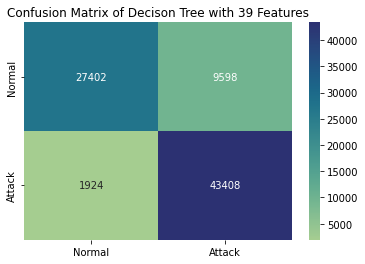

In [57]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

score1 = accuracy_score(y_test,y_pred_dt)

print("Testing accuracy of Decision Tree: ", score1)
print("Precision of Decision Tree: ", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall of Decision Tree:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1_Score of Decision Tree:", f1_score(y_test, y_pred_dt, average='macro'))

print("")
target_names = ["Normal", "Attack"]
print("Classification Report of Decision Tree  39 Features: \n", classification_report(y_test, y_pred_dt))

conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree with 39 Features')
plt.show()

Testing accuracy of Random Forest:  0.8718116892581257
Precision of Random Forest:  0.8978860371277906
Recall of Random Forest: 0.8589232878868456
F1_Score of Random Forest: 0.8656426172427958

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.73      0.84     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.87     82332
weighted avg       0.89      0.87      0.87     82332



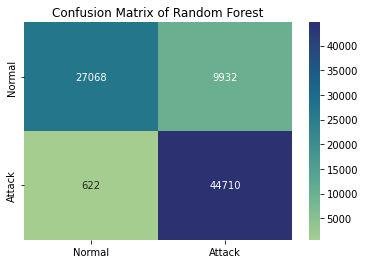

In [34]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

score2 = accuracy_score(y_test,y_pred_rf)

print("Testing accuracy of Random Forest: ", score2)
print("Precision of Random Forest: ", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall of Random Forest:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1_Score of Random Forest:", f1_score(y_test, y_pred_rf, average='macro'))

print("")
print("Classification Report of Random Forest: \n", classification_report(y_test, y_pred_rf))

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Random Forest')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy of Logistic Regression:  0.8040373123451392
Precision of Logistic Regression:  0.8491660859307861
Recall of Logistic Regression: 0.7847299658257039
F1_Score of Logistic Regression: 0.7886038407263524

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73     37000
           1       0.75      0.98      0.85     45332

    accuracy                           0.80     82332
   macro avg       0.85      0.78      0.79     82332
weighted avg       0.84      0.80      0.79     82332



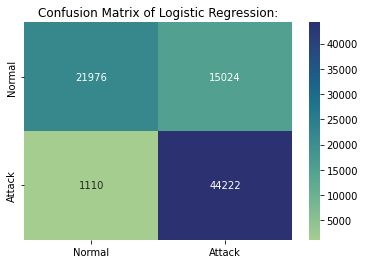

In [59]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

score3 = accuracy_score(y_test,y_pred_lr)

print("Testing accuracy of Logistic Regression: ", score3)
print("Precision of Logistic Regression: ", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall of Logistic Regression:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1_Score of Logistic Regression:", f1_score(y_test, y_pred_lr, average='macro'))

print("")
print("Classification Report of Logistic Regression: \n", classification_report(y_test, y_pred_lr))

conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat_lr, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression:')
plt.show()

Testing accuracy of Gaussian Naive Bayes:  0.7598989457319146
Precision of Gaussian Naive Bayes:  0.7881311972918816
Recall of Gaussian Naive Bayes: 0.7414786046966405
F1_Score of Gaussian Naive Bayes: 0.7429109662833938

Classification Report of Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68     37000
           1       0.72      0.92      0.81     45332

    accuracy                           0.76     82332
   macro avg       0.79      0.74      0.74     82332
weighted avg       0.78      0.76      0.75     82332



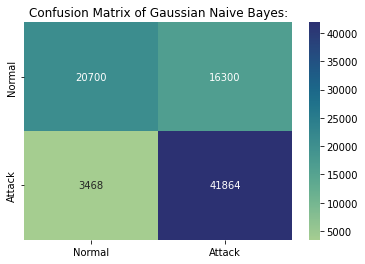

In [60]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

score4 = accuracy_score(y_test,y_pred_nb)

print("Testing accuracy of Gaussian Naive Bayes: ", score4)
print("Precision of Gaussian Naive Bayes: ", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall of Gaussian Naive Bayes:", recall_score(y_test, y_pred_nb, average='macro'))
print("F1_Score of Gaussian Naive Bayes:", f1_score(y_test, y_pred_nb, average='macro'))

print("")
print("Classification Report of Gaussian Naive Bayes: \n", classification_report(y_test, y_pred_nb))

conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_mat_nb, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Gaussian Naive Bayes:')
plt.show()

Testing accuracy of kNN:  0.8487101005684302
Precision of kNN:  0.87204318776236
Recall of kNN: 0.8355752061070159
F1_Score of kNN: 0.8414240710983085

Classification Report of kNN: 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     37000
           1       0.80      0.97      0.88     45332

    accuracy                           0.85     82332
   macro avg       0.87      0.84      0.84     82332
weighted avg       0.86      0.85      0.84     82332



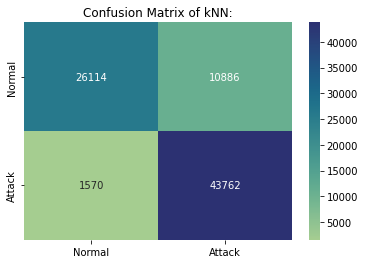

In [61]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

score5 = accuracy_score(y_test,y_pred_knn)

print("Testing accuracy of kNN: ", score5)
print("Precision of kNN: ", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall of kNN:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1_Score of kNN:", f1_score(y_test, y_pred_knn, average='macro'))

print("")
print("Classification Report of kNN: \n", classification_report(y_test, y_pred_knn))

conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of kNN:')
plt.show()

Testing accuracy of SGD:  0.8093450906087548
Precision of SGD:  0.8704861904542422
Recall of SGD: 0.7879951159135841
F1_Score of SGD: 0.79174455438551

Classification Report of Stochastic Gradient Descent: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     37000
           1       0.74      1.00      0.85     45332

    accuracy                           0.81     82332
   macro avg       0.87      0.79      0.79     82332
weighted avg       0.86      0.81      0.80     82332



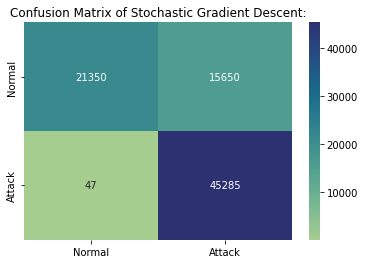

In [68]:
clf_sgd = SGDClassifier(random_state=random_seed)
clf_sgd.fit(X_train, y_train)

y_pred_sgd = clf_sgd.predict(X_test)

score6 = accuracy_score(y_test,y_pred_sgd)

print("Testing accuracy of SGD: ", score6)
print("Precision of SGD: ", precision_score(y_test, y_pred_sgd, average='macro'))
print("Recall of SGD:", recall_score(y_test, y_pred_sgd, average='macro'))
print("F1_Score of SGD:", f1_score(y_test, y_pred_sgd, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent: \n", classification_report(y_test, y_pred_sgd))

conf_mat_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(conf_mat_sgd, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent:')
plt.show()